# Project: Image Classification

In this project we will explore:
- Why image classification is a hard task
- Observe the limitations of traditional machine learning models for image classification
- Train, test, and improve a few different deep neural networks for image classification

We are using a dataset on handwritten characters found [here](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [114]:
# importing libraries
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from matplotlib.pyplot import figure
%matplotlib inline

We start with importing the hand-written digits dataset from UCI.

In [41]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [68]:
digits.data.shape

(1797, 64)

We can visualize the number by plotting the pixel numeric values as greyscale (higher value is darker).

Below, we can see the greyscale values for the number 0.

In [78]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Here is a visualisation of the first 8 numbers in the set. They are in the same handwriting.

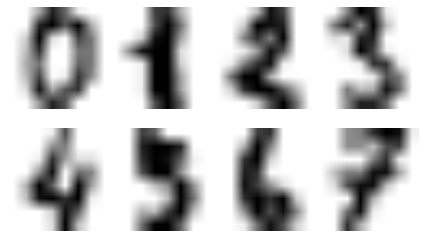

In [9]:
fig, ax_array = plt.subplots(2, 4)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Below is a mix of different handwritings:

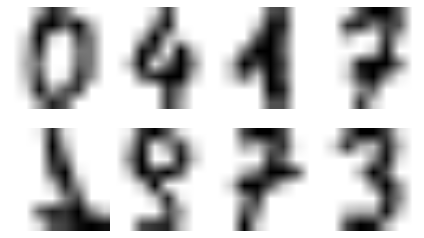

In [57]:
imageplot = [0,100,200,300,1000,1100,1200,1300]
fig, ax_array = plt.subplots(2, 4)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[imageplot[i]], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

# Training and testing a classifier

In [55]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


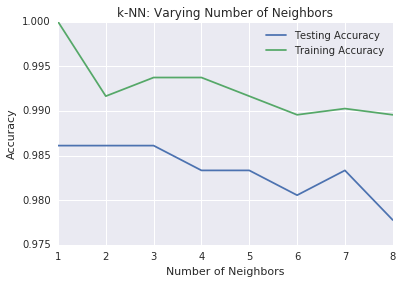

In [81]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Models that overfit tend to perform well on the train set, but poorly on the test set. In the plot abovewe see that the model is overfitted 8 neighbors.

# Neural Network

Although we reached 90% accuracy with our KNN model, we can probably get a higher percentage with a neural network. Neural networks are known for doing well in character recognition.

We will run the neural network model using a single hidden layer first and an increasing number of number of neurons.

In [79]:
accuracies_test = []
accuracies_train = []
neurons = [8, 16, 32, 64, 128, 256]
for i in neurons:
    # create model using i neurons
    mlp = MLPClassifier(hidden_layer_sizes=i, activation='relu', max_iter=1000)
    # fit the model on the training data
    mlp.fit(X_train, y_train)
    # make predictions for the test set
    nn_test_predictions = mlp.predict(X_test)
    # make predictions for the train set to check for overfitting
    nn_train_predictions = mlp.predict(X_train)
    # calculate test and train accuracy and append
    test_accuracy = accuracy_score(y_test, nn_test_predictions)
    train_accuracy = accuracy_score(y_train, nn_train_predictions)
    accuracies_test.append(test_accuracy)
    accuracies_train.append(train_accuracy)
print(accuracies_test)
print(accuracies_train)

[0.9527777777777777, 0.9527777777777777, 0.9638888888888889, 0.9722222222222222, 0.9833333333333333, 0.9861111111111112]
[0.9846903270702854, 0.9965205288796103, 1.0, 1.0, 1.0, 1.0]


*Results*

We can see that there is an increase in accuracy with when we increase the number of neurons, but with strong decreasing returns to scale. There is no difference between 128 and 256 neurons.

*Checking for overfitting*

We want to know which of these models start to overfit. We will need to compute accuracy on the trainset, which we can then compare to the accuracy on the test set.

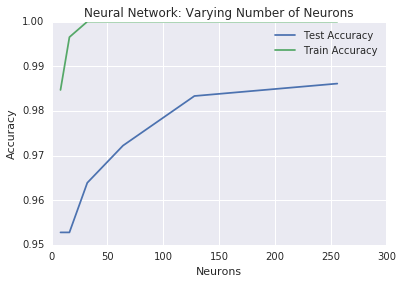

In [82]:
# Generate plot
plt.title('Neural Network: Varying Number of Neurons')
plt.plot(neurons, accuracies_test, label='Test Accuracy')
plt.plot(neurons, accuracies_train, label='Train Accuracy')
plt.legend()
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

Models that overfit tend to perform well on the train set, but poorly on the test set. 

There doesn't seem to be any overfitting in our Neural Network model, but we do notice decreasing returns to scale. Adding too many neurons will not hurt our accuracy, but it might not be efficient use of processing power.

Up untill now we have used just one hidden layer. Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6, while testing networks with 3 hidden layers.

In [84]:
# applying k-fold cross validation
kf = KFold(n_splits=6)
kf

KFold(n_splits=6, random_state=None, shuffle=False)

In [85]:
# creating function for getting score per model
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [91]:
get_score(knn, X_train, X_test, y_train, y_test)

0.9777777777777777

In [92]:
get_score(mlp, X_train, X_test, y_train, y_test)

0.9805555555555555

In [93]:
# creating nn model 3 layers
accuracies_test = []
accuracies_train = []
neurons = [10, 64, 128]
for i in neurons:
    # create model using i neurons
    mlp = MLPClassifier(hidden_layer_sizes=(i,i,i), activation='relu', max_iter=1000)
    # fit the model on the training data
    mlp.fit(X_train, y_train)
    # make predictions for the test set
    nn_test_predictions = mlp.predict(X_test)
    # make predictions for the train set to check for overfitting
    nn_train_predictions = mlp.predict(X_train)
    # calculate test and train accuracy and append
    test_accuracy = accuracy_score(y_test, nn_test_predictions)
    train_accuracy = accuracy_score(y_train, nn_train_predictions)
    accuracies_test.append(test_accuracy)
    accuracies_train.append(train_accuracy)
print(accuracies_test)
print(accuracies_train)

[0.9305555555555556, 0.975, 0.9805555555555555]
[0.9819067501739736, 1.0, 1.0]


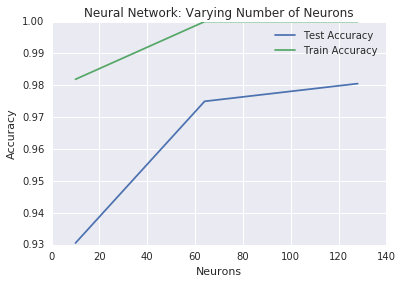

In [95]:
# Generate plot
plt.title('Neural Network: Varying Number of Neurons')
plt.plot(neurons, accuracies_test, label='Test Accuracy')
plt.plot(neurons, accuracies_train, label='Train Accuracy')
plt.legend()
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

We can see that the model performs poorer at lower numbers of neurons in the model with 3 layers compared to the model with just 1 layer. There doesn't seem to be any sign of overfitting.

We end this project with a visualisation of the weights (or coefficients) for the numbers. This illustrates how the model determines what number it is looking at.

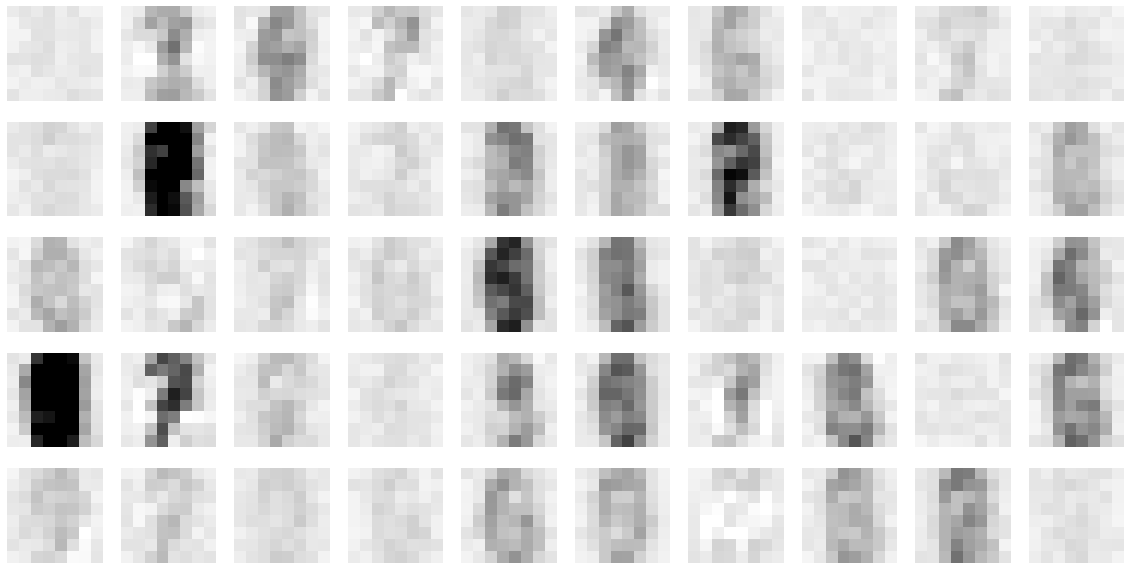

In [117]:
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

The model puts weights on the pixels. The darker the pixel, the larger the positive magnitude. The whiter the pixel, the larger the negative magnitude.